In [1]:
import numpy as np
import matplotlib.pyplot as plt

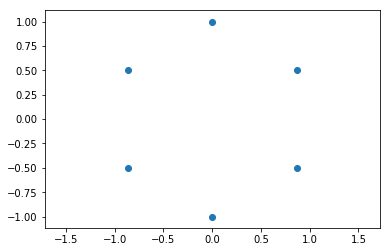

In [2]:
phi = np.pi/6
R = 1

# Number of circles and theirs center M(xM, yM)
N = 6
M = np.empty((N, 2))
angle = np.empty(N)

for i in range(N):
    # angles will be at degrees 30, 90, 150, 210, 270, 330
    a = phi + i * np.pi/3
    angle[i] = a
    M[i] = (R*np.cos(a), R*np.sin(a))  # calculate Mi = (xMi, yMi)

_ = plt.scatter(*zip(*M))  # plot all 6 M(s)
_ = plt.axis('equal')

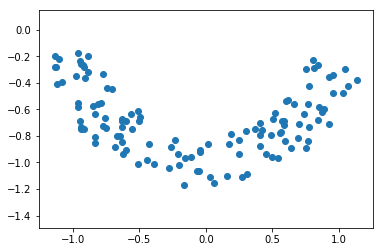

In [3]:
delta = 0.2
size = 120  # number of points for each small half-circle

P_M = [None]*N    # points relative to Mi co-ordinate system
color = [None]*N  # N=6 groups, each group has 'size' of same color
for i in range(N):
    r = np.random.uniform(R-delta, R+delta, (size, 1))
    alpha = np.random.uniform(np.pi + np.pi/18, 2*np.pi - np.pi/12, (size, 1))

    P_M[i] = np.concatenate([r * np.cos(alpha), r * np.sin(alpha)], axis=1)
    color[i] = np.full(size, 'r' if i % 2 == 0 else 'b')
    
# Plot group 0 for example
_ = plt.scatter(*zip(*P_M[1]))
_ = plt.axis('equal')


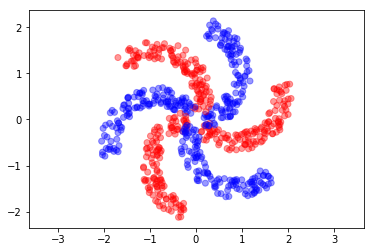

In [4]:
P = [None]*N
for i in range(N):
    # Determine the rotation matrix
    a = angle[i]
    rotate = np.array([[np.cos(a), np.sin(a)],
                       [-np.sin(a), np.cos(a)]])
    rotated_P_M = np.dot(P_M[i], rotate)  # rotating
    P[i] = rotated_P_M + M[i]             # moving

all_points = np.concatenate(P)  # flatten all points (x,y)
all_colors = np.concatenate(color)                   # flatten all colors

_ = plt.scatter(*zip(*all_points), alpha=0.4, c=all_colors)
_ = plt.axis('equal')